# Univariate Analysis on Numerical Columns
- Single variable

## Load the data
- Here I load the **pickle file** that was saved in step1

In [1]:
# Do the necessary imports
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# We load data

df = pd.read_csv("data_MPG.csv") 

In [3]:
# print 10 sample values

print(df.sample(10))

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
188  16.0          8         318.0       150.0    4190          13.0   
78   21.0          4         120.0        87.0    2979          19.5   
350  34.7          4         105.0        63.0    2215          14.9   
250  19.4          8         318.0       140.0    3735          13.2   
29   27.0          4          97.0        88.0    2130          14.5   
150  26.0          4         108.0        93.0    2391          15.5   
341  23.5          6         173.0       110.0    2725          12.6   
202  17.5          6         258.0        95.0    3193          17.8   
212  16.5          8         350.0       180.0    4380          12.1   
89   15.0          8         318.0       150.0    3777          12.5   

     model_year  origin                    name  
188          76     usa  dodge coronet brougham  
78           72  europe        peugeot 504 (sw)  
350          81     usa      plymouth horizon 4  
250    

## Identify numeric columns

In [4]:
# Lets identify numeric columns

# numeric_cols = df.select_dtypes(include='number').columns.tolist() # based on data type
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration'] # manually pick few numeric columns 

print(numeric_cols)

['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


## Boxplot
Now I want to identify outliers and see the main  bulk of data lies

In [5]:
# Optional: Choose palette and font scale

plt.style.use("dark_background")  
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=["gold"])
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "lines.linewidth": 2.5
})


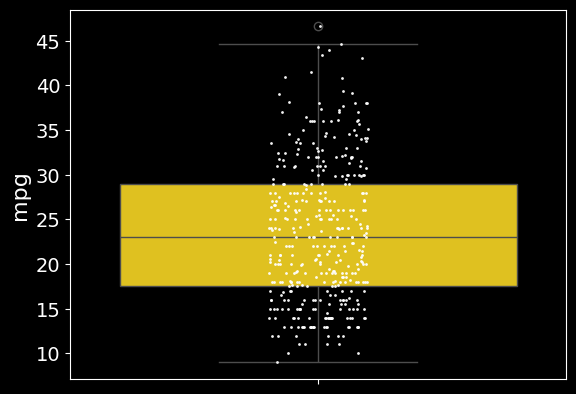

In [6]:
# 1: First do this for 1 columns
import seaborn as sns 

col = 'mpg'

sns.boxplot(  data=df, y=col, color='gold')
sns.stripplot(data=df, y=col, color='white', size=2, alpha=0.95)

plt.show()

## IQR

In [7]:
# Calculate Q1, Q2, Q3, IQR

col = 'mpg'

Q1 = df[col].quantile(0.25)
Q2 = df[col].quantile(0.50)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1}")
print(f"Q2 (Median, 50th percentile): {Q2}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")

# Identify Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

print(f"Outliers:\n{outliers}")

Q1 (25th percentile): 17.5
Q2 (Median, 50th percentile): 23.0
Q3 (75th percentile): 29.0
IQR (Q3 - Q1): 11.5
Outliers:
322    46.6
Name: mpg, dtype: float64


## Z-score

In [8]:
col = "mpg"

mean = df[col].mean()
std  = df[col].std()

df["z_score"] = (df[col] - mean) / std

# Outliers
outliers = df[df["z_score"].abs() > 2.9]
print(outliers)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
322  46.6          4          86.0        65.0    2110          17.9   

     model_year origin       name   z_score  
322          80  japan  mazda glc  2.953617  


# Now we do above for all columns

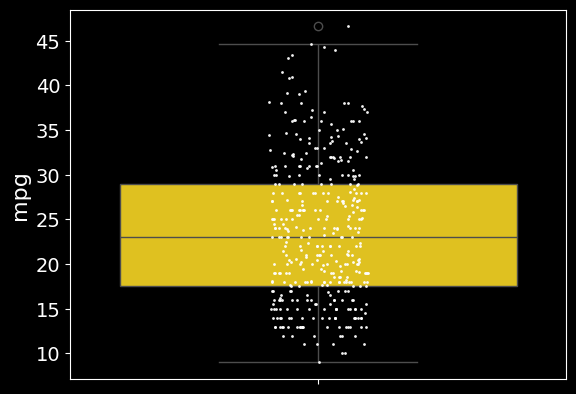

#####
Q1 (25th percentile): 17.5
Q2 (Median, 50th percentile): 23.0
Q3 (75th percentile): 29.0
IQR (Q3 - Q1): 11.5
Outliers(IQR):
322    46.6
Name: mpg, dtype: float64
++++++++++


Outliers (Z-method):
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
322  46.6          4          86.0        65.0    2110          17.9   

     model_year origin       name   z_score  
322          80  japan  mazda glc  2.953617  
******************************************


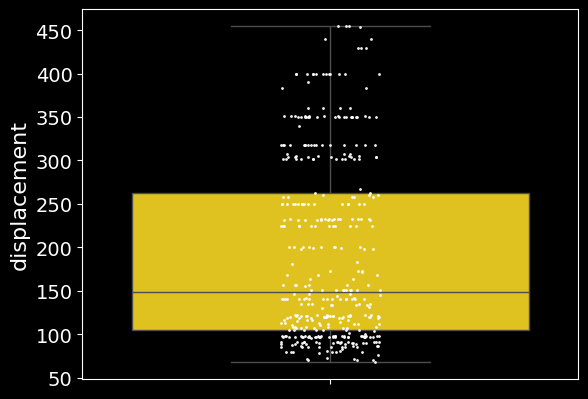

#####
Q1 (25th percentile): 104.25
Q2 (Median, 50th percentile): 148.5
Q3 (75th percentile): 262.0
IQR (Q3 - Q1): 157.75
Outliers(IQR):
Series([], Name: displacement, dtype: float64)
++++++++++


Outliers (Z-method):
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, name, z_score]
Index: []
******************************************


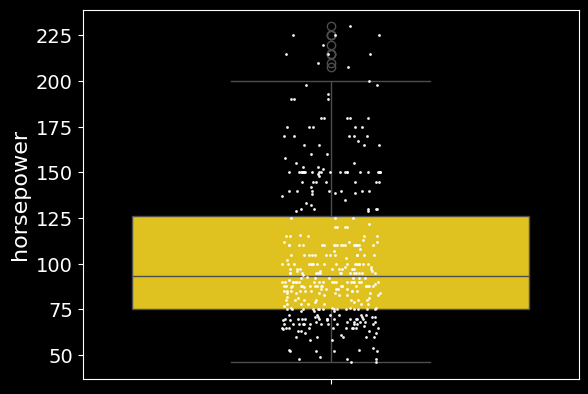

#####
Q1 (25th percentile): 75.0
Q2 (Median, 50th percentile): 93.5
Q3 (75th percentile): 126.0
IQR (Q3 - Q1): 51.0
Outliers(IQR):
6      220.0
7      215.0
8      225.0
13     225.0
25     215.0
27     210.0
67     208.0
94     215.0
95     225.0
116    230.0
Name: horsepower, dtype: float64
++++++++++


Outliers (Z-method):
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
6    14.0          8         454.0       220.0    4354           9.0   
7    14.0          8         440.0       215.0    4312           8.5   
8    14.0          8         455.0       225.0    4425          10.0   
13   14.0          8         455.0       225.0    3086          10.0   
25   10.0          8         360.0       215.0    4615          14.0   
94   13.0          8         440.0       215.0    4735          11.0   
95   12.0          8         455.0       225.0    4951          11.0   
116  16.0          8         400.0       230.0    4278           9.5   

     model_year origin 

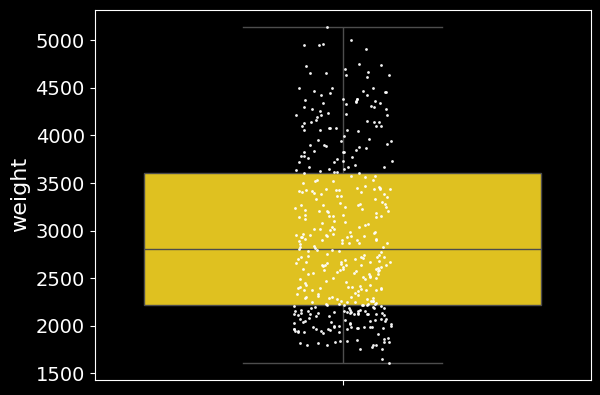

#####
Q1 (25th percentile): 2223.75
Q2 (Median, 50th percentile): 2803.5
Q3 (75th percentile): 3608.0
IQR (Q3 - Q1): 1384.25
Outliers(IQR):
Series([], Name: weight, dtype: int64)
++++++++++


Outliers (Z-method):
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, name, z_score]
Index: []
******************************************


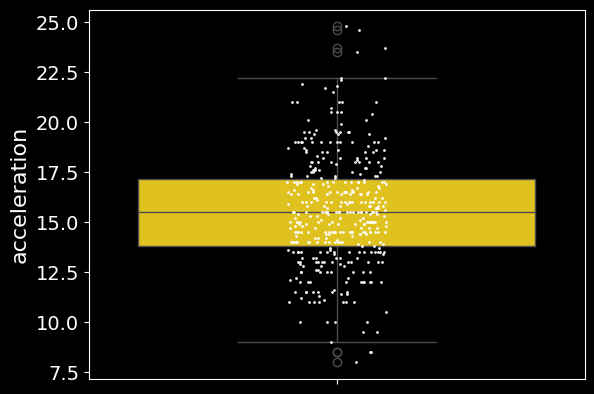

#####
Q1 (25th percentile): 13.825000000000001
Q2 (Median, 50th percentile): 15.5
Q3 (75th percentile): 17.175
IQR (Q3 - Q1): 3.3499999999999996
Outliers(IQR):
7       8.5
9       8.5
11      8.0
59     23.5
299    24.8
326    23.7
394    24.6
Name: acceleration, dtype: float64
++++++++++


Outliers (Z-method):
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
59   23.0          4          97.0        54.0    2254          23.5   
299  27.2          4         141.0        71.0    3190          24.8   
326  43.4          4          90.0        48.0    2335          23.7   
394  44.0          4          97.0        52.0    2130          24.6   

     model_year  origin                name   z_score  
59           72  europe   volkswagen type 3  2.876289  
299          79  europe         peugeot 504  3.347698  
326          80  europe  vw dasher (diesel)  2.948813  
394          82  europe           vw pickup  3.275173  
******************************************


In [12]:
#Do this for all numeric columns

columns = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

for col in columns:    
    sns.boxplot(  data=df, y=col, color='gold')
    sns.stripplot(data=df, y=col, color='white', size=2, alpha=0.95)
    
    plt.show()
    
    print("#####")
    
    # Calculate Q1, Q2, Q3, IQR
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.5)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    print(f"Q1 (25th percentile): {Q1}")
    print(f"Q2 (Median, 50th percentile): {Q2}")
    print(f"Q3 (75th percentile): {Q3}")
    print(f"IQR (Q3 - Q1): {IQR}")
    
    # Identify Outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"Outliers(IQR):\n{outliers}")
    
    print("++++++++++\n\n")
    mean = df[col].mean()
    std  = df[col].std()
    
    df["z_score"] = (df[col] - mean) / std
    
    # Outliers
    outliers = df[df["z_score"].abs() > 2.8]
    print(f"Outliers (Z-method):\n{outliers}")
    
    print("******************************************")